In [63]:
import sys
print(sys.version)

3.6.2 |Continuum Analytics, Inc.| (default, Jul 20 2017, 13:14:59) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [64]:
import sklearn
sklearn.__version__

'0.19.0'

In [65]:
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [66]:
X = data.data
X.shape

(569, 30)

In [67]:
noise = np.random.randn( X.shape[0],X.shape[0])

In [68]:
X = np.hstack([X,noise]) #adding noiseas features, to make the problem harder to solve
X.shape

(569, 30)

In [69]:
Y = data.target

In [70]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [71]:
lr = LR(C=1.0) #hyperparameter 
lr.fit(X_train,Y_train) #(..)  train!
#penalty :l2 #C=  1 / Lambda #class_weight , if cluster too big or too small, balanced

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
lr.score(X_test,Y_test) #model apply on test data and result!

0.965034965034965

In [73]:
from sklearn.metrics import precision_score, recall_score

In [74]:
precision = precision_score(Y_test,lr.predict(X_test),pos_label = 1) #1=cancer
recall    = recall_score(Y_test, lr.predict(X_test),pos_label = 1)
print (precision) #Guess and right     0.9 - noise -> 
print(recall)     #Cancer and found!   1.0 - noise -> 

0.947368421053
1.0


In [75]:
precision = precision_score(Y_test,lr.predict(X_test),pos_label = 0) #0=not cancer
recall    = recall_score(Y_test, lr.predict(X_test),pos_label = 0)
print (precision) #Guess and right
print(recall)     #Cancer and found!

1.0
0.905660377358


In [76]:
lr.classes_  #labels

array([0, 1])

In [77]:
from sklearn.metrics import roc_curve
#TPR = TP/P = TP/Cancer(=recall); FPR = FP/N= FP/No Cancer
fpr,tpr,thresholds = roc_curve(Y_test,lr.predict_proba(X_test)[:,1],pos_label = 1)

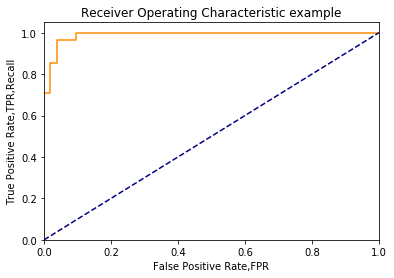

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr,tpr,color = 'darkorange')
plt.plot([0,1],[0,1],color = 'navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate,FPR')
plt.ylabel('True Positive Rate,TPR,Recall')
plt.title('Receiver Operating Characteristic example')
plt.show()

In [79]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [80]:
data.target[[10, 50, 85]]
#array([0, 1, 0])

array([0, 1, 0])

In [81]:
list(data.target_names)
#['malignant', 'benign']

['malignant', 'benign']

In [82]:
#(..) logistic
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split

In [83]:
lr = LR(C=1.0)

In [84]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [85]:
print (data.data.shape)
print (data.data)

(569, 30)
[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]


In [86]:
print (data.target.shape)
print (data.target)

(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0

In [87]:
# dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
print (data.target_names.shape)
print (data.target_names)

(2,)
['malignant' 'benign']


In [88]:
# dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
# print (data.DESCR.shape)
print (data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [89]:
# dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
# print (data.feature_names.shape)
print (data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [90]:
print (data)

{'data': array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 